In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [165]:
df = pd.read_csv("seattle_weather.csv")

In [166]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [167]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [168]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [169]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [170]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [171]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [172]:
df.duplicated().sum()

0

In [173]:
df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


In [175]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [176]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [177]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [178]:
df_by_preci = df.groupby(["year"])["precipitation"].agg(["sum"])

In [179]:
df_by_preci

,sum
year,
2012,1226.0
2013,828.0
2014,1232.8
2015,1139.2


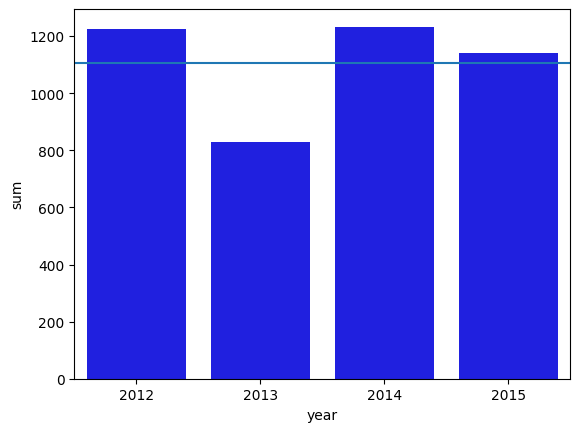

In [180]:
sns.barplot(x = df_by_preci.index, y=df_by_preci["sum"], data=df_by_preci, color="blue")
plt.axhline(y=df_by_preci["sum"].mean())

<Axes: xlabel='temp_max', ylabel='Count'>

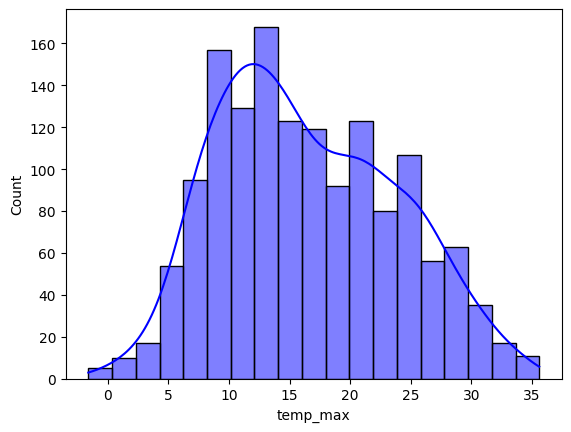

In [181]:
sns.histplot(x="temp_max", data=df, binwidth=2, kde=True, color="blue")

<Axes: xlabel='temp_max'>

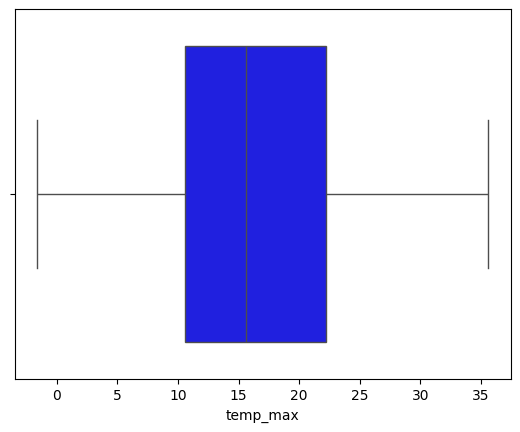

In [182]:
sns.boxplot(x="temp_max", data=df, color="blue")

<Axes: xlabel='temp_min'>

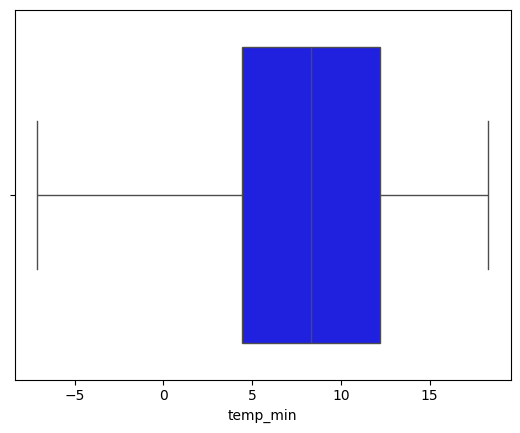

In [183]:
sns.boxplot(x="temp_min", data=df, color="blue")

<Axes: xlabel='wind'>

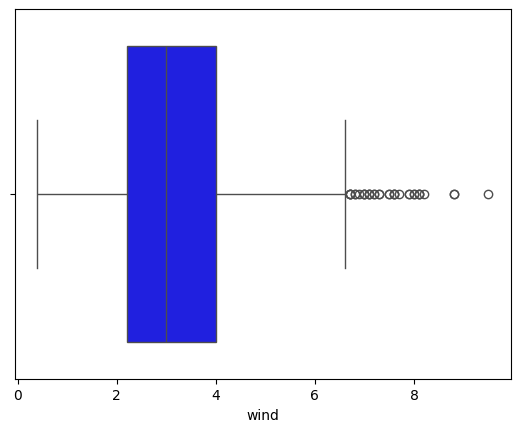

In [184]:
sns.boxplot(x="wind", data=df, color="blue")

<Axes: xlabel='precipitation'>

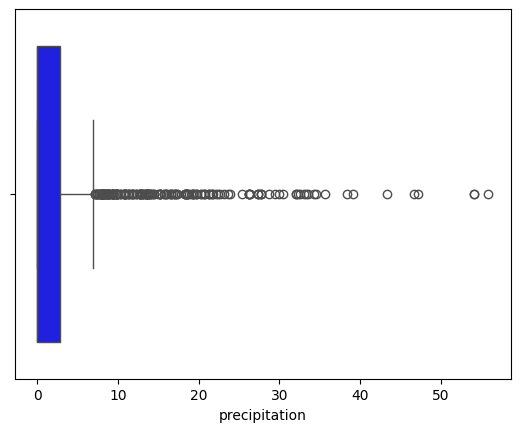

In [185]:
sns.boxplot(x="precipitation", data=df, color="blue")

In [186]:
df.shape

(1461, 9)

<Axes: xlabel='precipitation', ylabel='Count'>

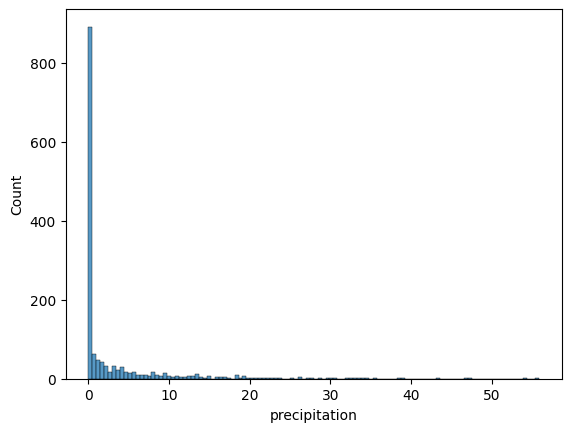

In [187]:
sns.histplot(df["precipitation"])

In [188]:
df[df["precipitation"]<0]

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day


In [189]:
q1 = df["precipitation"].quantile(0.25)
q3 = df["precipitation"].quantile(0.75)
iqr = q3-q1
med = df["precipitation"].median()
low = med - (1.5*iqr)
high = med + (1.5*iqr)
low, high

(-4.199999999999999, 4.199999999999999)

In [190]:
outlier = df[df["precipitation"]>high]
outlier

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2012,1,9
14,2012-01-15,5.3,1.1,-3.3,3.2,snow,2012,1,15
16,2012-01-17,8.1,3.3,0.0,5.6,snow,2012,1,17
...,...,...,...,...,...,...,...,...,...
1450,2015-12-21,27.4,5.6,2.8,4.3,rain,2015,12,21
1451,2015-12-22,4.6,7.8,2.8,5.0,rain,2015,12,22
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,2015,12,23
1454,2015-12-25,5.8,5.0,2.2,1.5,rain,2015,12,25


In [191]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [192]:
df["weather"].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

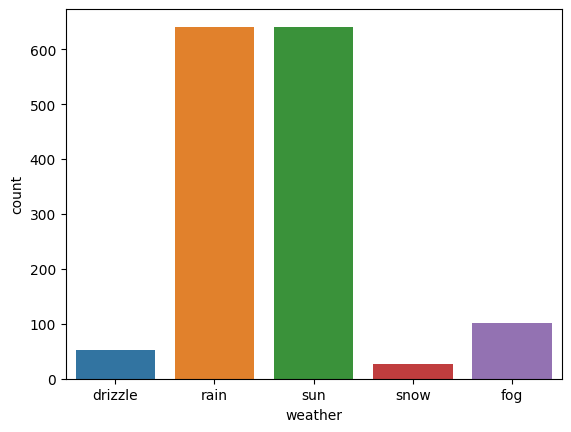

In [193]:
sns.countplot(x="weather", data=df, hue="weather", )

# Binary Gaussian Naive Bayes + Logistic regression model

In [194]:
df_binary = df[(df["weather"]=="sun") | (df["weather"]=="rain")]

In [195]:
df_binary.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2012,1,6


In [196]:
df_binary["weather"].value_counts()

weather
rain    641
sun     640
Name: count, dtype: int64

In [197]:
df_binary = df_binary.drop(columns=["date", "year", "month", "day"])

In [198]:
df_binary.head()

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain


In [199]:
df_binary["weather"] = df_binary["weather"].map({'rain' : 1, 'sun' : 0})

In [201]:
df_binary.head()

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1
5,2.5,4.4,2.2,2.2,1


In [202]:
y = df_binary["weather"]
X = df_binary.copy()
X = X.drop(columns=["weather"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Binary Logistic regression

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
clf = LogisticRegression().fit(X_train, y_train)

In [205]:
clf.coef_

array([[ 7.2017577 , -0.22364365,  0.23054167, -0.01986529]])

In [206]:
y_pred = clf.predict(X_test)

In [207]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("f1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Recall score: 0.9
Accuracy score: 0.9454545454545454
f1 score: 0.9473684210526315


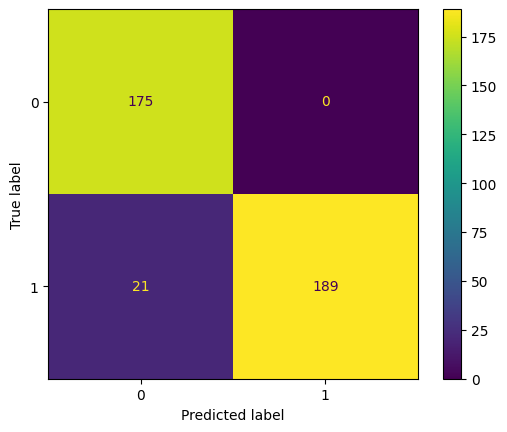

In [208]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [211]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       175
           1       1.00      0.90      0.95       210

    accuracy                           0.95       385
   macro avg       0.95      0.95      0.95       385
weighted avg       0.95      0.95      0.95       385



# Binary Gaussian Naive Bayes model

In [212]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [213]:
gnb = GaussianNB().fit(X_train, y_train)

In [214]:
y_pred = gnb.predict(X_test)

In [215]:
print("Precision score: " + str(precision_score(y_test, y_pred)))
print("Recall score: " + str(recall_score(y_test, y_pred)))
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
print("f1 score: " + str(f1_score(y_test, y_pred)))

Precision score: 1.0
Recall score: 0.9142857142857143
Accuracy score: 0.9532467532467532
f1 score: 0.9552238805970149


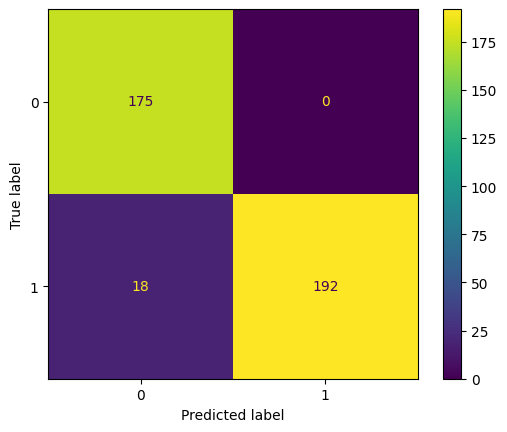

In [216]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [217]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       175
           1       1.00      0.91      0.96       210

    accuracy                           0.95       385
   macro avg       0.95      0.96      0.95       385
weighted avg       0.96      0.95      0.95       385



# full potential Logistic regression

In [218]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [219]:
df = df.drop(columns=["date", "month", "day", "year"])
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [220]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [221]:
df["weather"] = df["weather"].map(
    {
        "drizzle" : 0,
        "rain" : 0,
        "sun" : 2,
        "snow" : 3,
        "fog" : 4
    }
)

In [222]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,0
2,0.8,11.7,7.2,2.3,0
3,20.3,12.2,5.6,4.7,0
4,1.3,8.9,2.8,6.1,0


In [223]:
y = df["weather"]
X = df.copy()
X = X.drop(columns=["weather"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [224]:
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [225]:
y_pred = clf.predict(X_test)

In [227]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       209
           2       0.75      1.00      0.86       192
           3       1.00      0.12      0.22         8
           4       0.00      0.00      0.00        30

    accuracy                           0.84       439
   macro avg       0.68      0.49      0.49       439
weighted avg       0.80      0.84      0.80       439



C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

# Full potential Gaissian Naive Bayes

In [228]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,0
2,0.8,11.7,7.2,2.3,0
3,20.3,12.2,5.6,4.7,0
4,1.3,8.9,2.8,6.1,0


In [229]:
y = df["weather"]
X = df.copy()
X = X.drop(columns=["weather"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [230]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [232]:
gnb = GaussianNB().fit(X_train, y_train)

In [233]:
y_pred = gnb.predict(X_test)

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       209
           2       0.76      1.00      0.87       192
           3       0.22      0.50      0.31         8
           4       0.00      0.00      0.00        30

    accuracy                           0.82       439
   macro avg       0.49      0.57      0.51       439
weighted avg       0.80      0.82      0.80       439



C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati